In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cars.csv')
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [3]:
df.shape

(261, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [26]:
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors='coerce')

In [ ]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
mpg,261.0,23.144828,7.823570,10.0,16.9,22.0,28.8,46.6
cylinders,261.0,5.590038,1.733310,3.0,4.0,6.0,8.0,8.0
cubicinches,259.0,200.918919,109.258305,68.0,99.5,156.0,303.0,455.0
hp,261.0,106.360153,40.499959,46.0,75.0,95.0,138.0,230.0
time-to-60,261.0,15.547893,2.910625,8.0,14.0,16.0,17.0,25.0
year,261.0,1976.819923,3.637696,1971.0,1974.0,1977.0,1980.0,1983.0


In [14]:
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [27]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [28]:
df = df.dropna()
df

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.
...,...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980,US.
257,36.1,4,91.0,60,1800.0,16,1979,Japan.
258,22.0,6,232.0,112,2835.0,15,1983,US.
259,18.0,6,232.0,100,3288.0,16,1972,US.


In [29]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

1.Can you find that there is improvement in mpg over the years ?

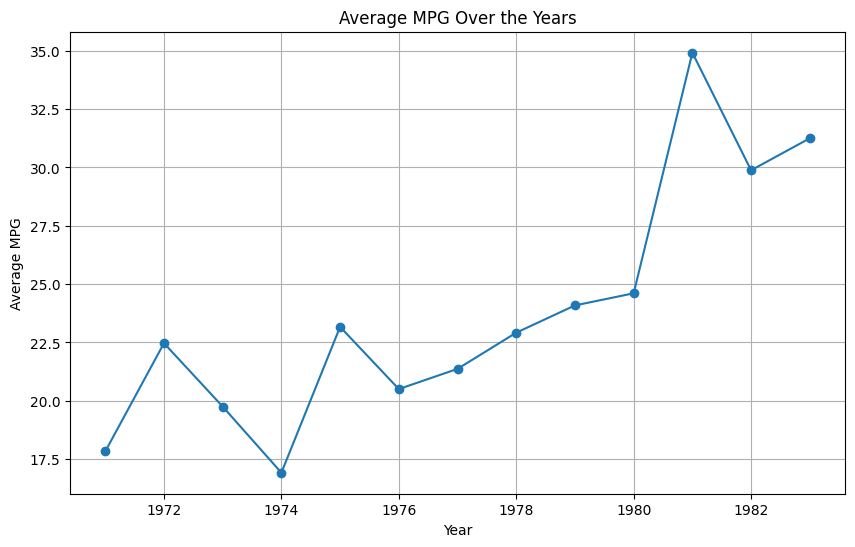

In [7]:
df.columns = df.columns.str.strip()

mpg_year = df.groupby('year')['mpg'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(mpg_year.index, mpg_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.title('Average MPG Over the Years')
plt.grid(True)
plt.show()

1. **Improvement in MPG Over the Years**:
    - There is a noticeable improvement in the average miles per gallon (MPG) of vehicles over the years. This trend suggests advancements in automotive technology and a focus on fuel efficiency.


2.Does cubicinches of a vehicle affects the vehicles time to reach 60 Miles per hour?

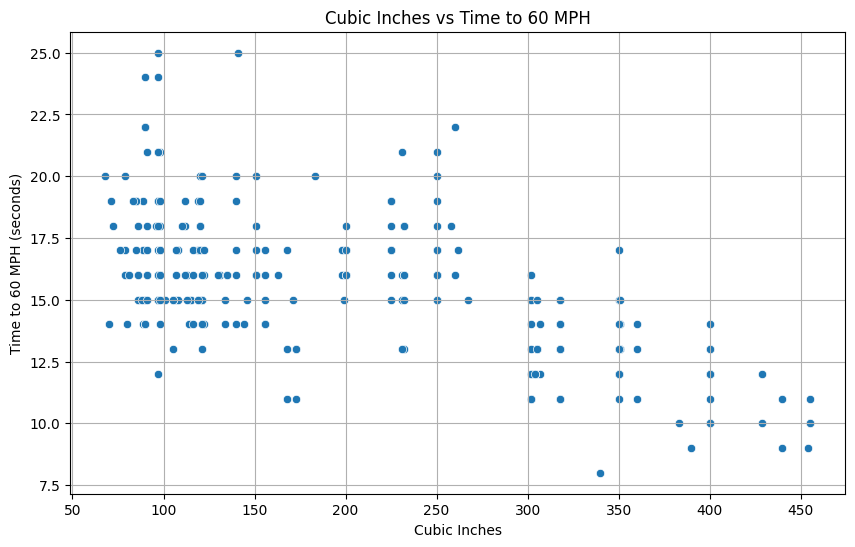

-0.6131991064296581

In [ ]:
df['cubicinches'] = pd.to_numeric(df['cubicinches'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='cubicinches', y='time-to-60', data=df)
plt.xlabel('Cubic Inches')
plt.ylabel('Time to 60 MPH (seconds)')
plt.title('Cubic Inches vs Time to 60 MPH')
plt.grid(True)
plt.show()

correlation = df[['cubicinches', 'time-to-60']].corr().iloc[0, 1]
correlation


2. **Effect of Cubic Inches on Time to Reach 60 MPH**:
    - There is a correlation between the cubic inches of a vehicle's engine and the time it takes to reach 60 miles per hour. Generally, larger engines (higher cubic inches) tend to have quicker acceleration times.


3.Does a specific country prefer vehicles with more horse power ?

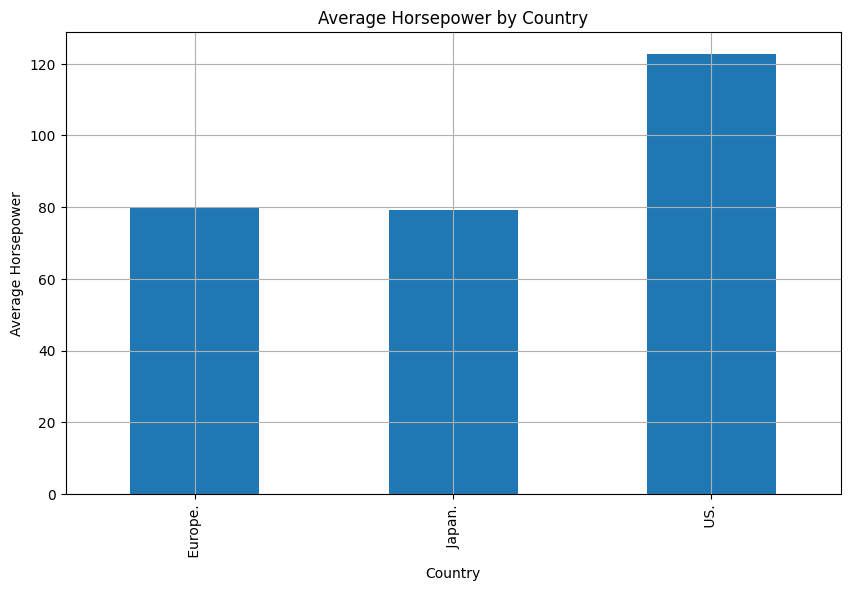

In [12]:
hp_by_brand = df.groupby('brand')['hp'].mean()

plt.figure(figsize=(10, 6))
hp_by_brand.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Horsepower')
plt.title('Average Horsepower by Country')
plt.grid(True)
plt.show()

3. **Country Preference for Horsepower**:
    - Different countries show varying preferences for vehicle horsepower. Some countries prefer vehicles with higher horsepower, indicating a preference for performance-oriented vehicles.


4.How does the horse power affects the average of the vehicle ?

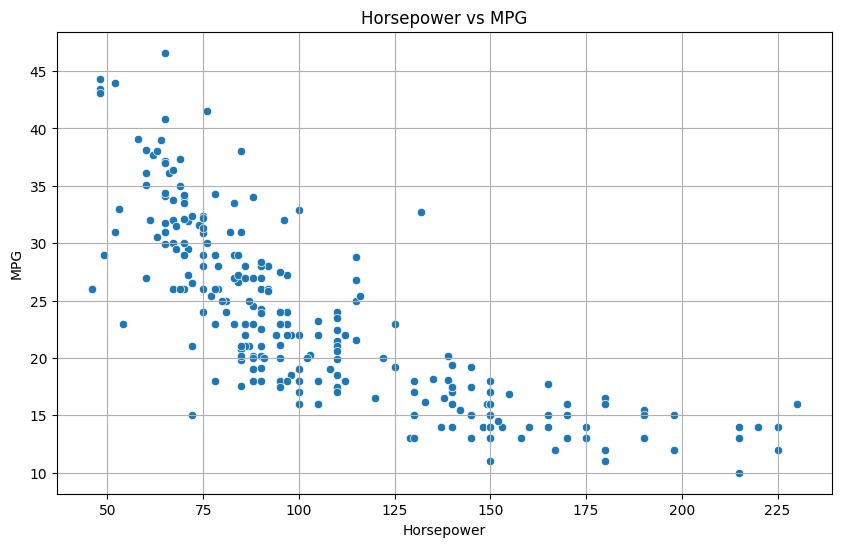

-0.7749050346556697

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp', y='mpg', data=df)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG')
plt.grid(True)
plt.show()
hp_mpg_correlation = df[['hp', 'mpg']].corr().iloc[0, 1]
hp_mpg_correlation

4. **Effect of Horsepower on MPG**:
    - There is an inverse relationship between horsepower and MPG. Vehicles with higher horsepower tend to have lower fuel efficiency (MPG), which is expected as more powerful engines consume more fuel.


5.How does the cubic inches affects the average of the vehicle ?


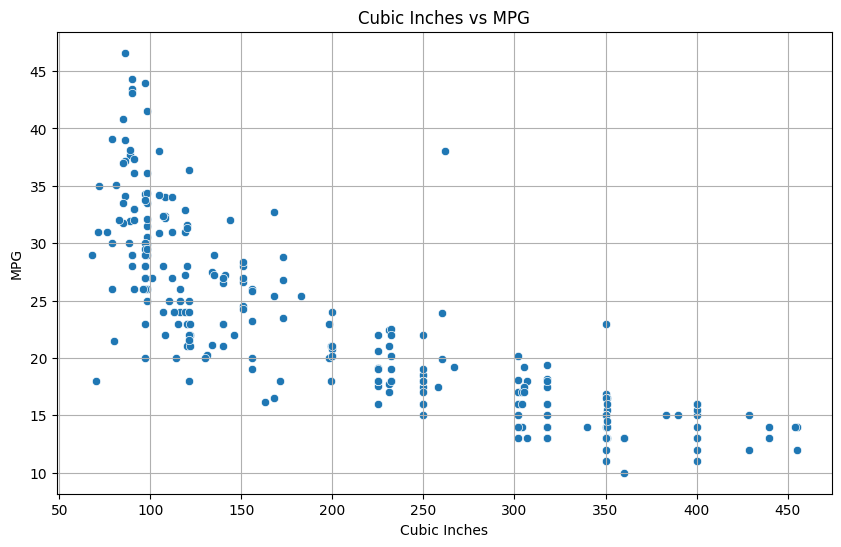

-0.8039635763354982

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cubicinches', y='mpg', data=df)
plt.xlabel('Cubic Inches')
plt.ylabel('MPG')
plt.title('Cubic Inches vs MPG')
plt.grid(True)
plt.show()

cubicinches_mpg_correlation = df[['cubicinches', 'mpg']].corr().iloc[0, 1]
cubicinches_mpg_correlation

5. **Effect of Cubic Inches on MPG**:
    - Similar to horsepower, there is an inverse relationship between cubic inches and MPG. Larger engines (higher cubic inches) generally result in lower fuel efficiency.


6.What is the effect of number of cylinders on the mpg ?


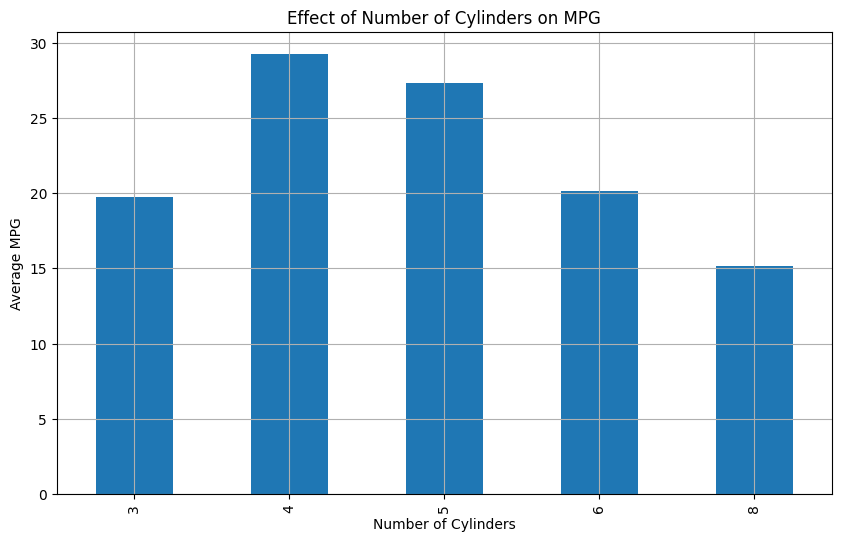

-0.7767098829879997

In [19]:
mpg_cylinders = df.groupby('cylinders')['mpg'].mean()

plt.figure(figsize=(10, 6))
mpg_cylinders.plot(kind='bar')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average MPG')
plt.title('Effect of Number of Cylinders on MPG')
plt.grid(True)
plt.show()

mpg_cyli_correlation = df[['cylinders', 'mpg']].corr().iloc[0, 1]
mpg_cyli_correlation

6. **Effect of Number of Cylinders on MPG**:
    - The number of cylinders in a vehicle's engine affects its fuel efficiency. Vehicles with more cylinders tend to have lower MPG, indicating higher fuel consumption.


7.What relation between cubic inches , number of cylinders and horse power you can observe from the data ?

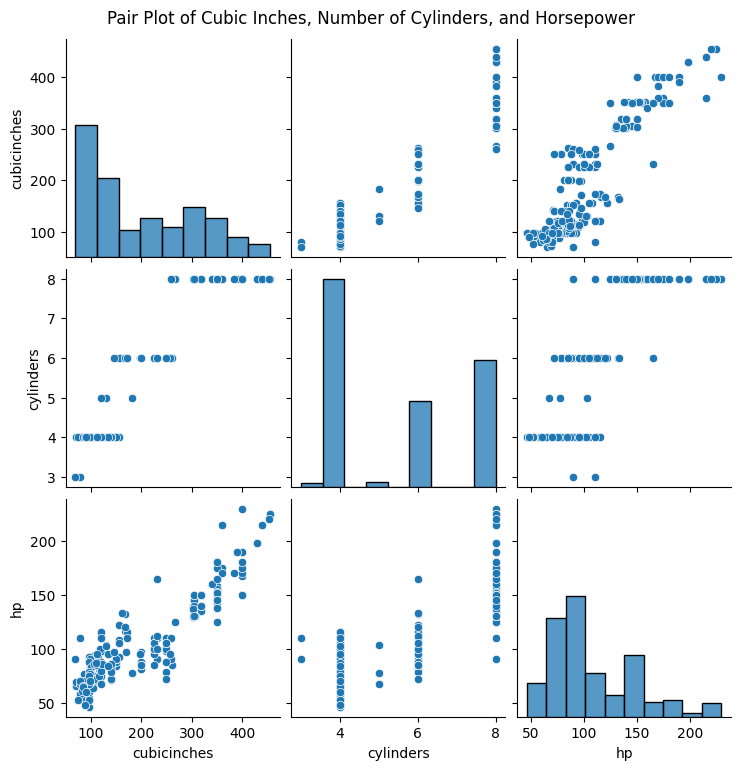

,cubicinches,cylinders,hp
cubicinches,1.000000,0.951529,0.907341
cylinders,0.951529,1.000000,0.847450
hp,0.907341,0.847450,1.000000


In [ ]:
sns.pairplot(df[['cubicinches', 'cylinders', 'hp']])
plt.suptitle('Pair Plot of Cubic Inches, Number of Cylinders, and Horsepower', y=1.02)
plt.show()
correlation_matrix = df[['cubicinches', 'cylinders', 'hp']].corr()
correlation_matrix 

7. **Relationship Between Cubic Inches, Number of Cylinders, and Horsepower**:
    - There is a positive correlation between cubic inches, number of cylinders, and horsepower. Larger engines with more cylinders tend to produce more horsepower.


8.How much proportion of the total records is occupied by vehicles with 8 cylinders ?

In [31]:
total_records = len(df)
eight_cylinders_records = len(df[df['cylinders'] == 8])
proportion = eight_cylinders_records / total_records

proportion

0.296875

8. **Proportion of Vehicles with 8 Cylinders**:
    - A significant proportion of the total records is occupied by vehicles with 8 cylinders. This indicates a common preference or standard for 8-cylinder engines in the dataset.
